# Using sympy to solve odes

In the following we look at how we can solve the simple harmonic oscillator
$$
\ddot{x} = -\omega_0^2 x
$$
using Python's sympy library.  

This will be done in two different ways.  The first will be symbolically and the second will be numerically.


## Symbolic Solution

First we need to import the library `sympy`.

In [35]:
from sympy import *
import numpy as np
init_printing()  #This command will make the equations display in a
                 # more readable way

next we need to define some symbols.  Below, the variables $t$, $v_0$, $x_0$ and $\omega_0$ are defined as symbols and we define $x$ as a function.  Eventually, we make it a function of $t$.

In [36]:
t,omega_0,v_0,x_0 = symbols('t,omega_0,v_0,x_0')
x = Function('x')
y = Function('y')

Next we can use the function `dsolve` to get a solution to the ODE above.  Note that `dsolve` requires the equation
$$
\ddot{x} + \omega_0^2 x = 0.
$$
We deine the second derivate of $x$ with respect to $t$ with the command `Derivative(x(t),t,2)`. 

In [37]:
sol = dsolve(Derivative(x(t),t,2)+omega_0*x(t))
sol


The `sol` variable we have above is of type tuple. So we can access the right and left hand side with indexes.

In [38]:
type(sol.args[0])
print('rhs:',sol.args[0])
print("lhs:",sol.args[1])

rhs: x(t)
lhs: C1*exp(-t*sqrt(-omega_0)) + C2*exp(t*sqrt(-omega_0))


Notice that the solution contains two constants $C_1$ and $C_2$.  These constants can be determined with the initial conditions $v_0$ and $x_0$ we defined as symbols above.

In the code below the function `Eq` defines an equality, in the first case we make $x(t=0) = x_0$ and the second we set $\dot{x}(t=0) = v_0$.

In [39]:
ics = [Eq(sol.args[1].subs(t,0),x_0),Eq(sol.args[1].diff(t).subs(t,0),v_0)]
ics

We can then solve the equations above using the function `solve`.

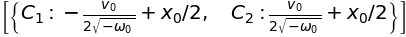

In [40]:
solved_ics = solve(ics)
solved_ics

Next we subsitute $C_1$ and $C_2$ into the solution, `sol`, above.

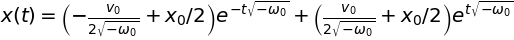

In [41]:
full_sol = sol.subs(solved_ics[0])
full_sol

In [42]:

case1 = simplify(full_sol.subs({x_0:1,v_0:0,omega_0:1}))
case1

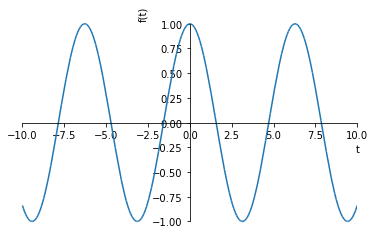

In [43]:
plot(case1.rhs)

## Numerical Solution

This method uses the `scipy` library and the `odeint` function.

The `odeint` function requires a function which returns the right hand side of a system of first order differential equations.  Our equation 
$$
\ddot{x} = \omega_0 x
$$
can be  written as system of two first order differential equations.  if we let $\dot{x} = v$ we can write the second order ode above as

$$
\begin{eqnarray}
    \dot{x} &= v \\
    \dot{v} &= -\omega_0^2x
\end{eqnarray}
$$

The function, `harmonic`, below returns the RHS.  Also, the time step $dt$ and initial conditions are defined as well as the output times, $ts$ which will be output from `odeint`.

In [44]:
def harmonic(u,t,omega_squared):
    ''' provides the rhs of the ode for the simple harmonic oscillator'''
    x, xdot = u
    return [xdot, -omega_squared * x]

dt = .2
x0 = [1,0]
ts = np.arange(0,10,dt)

In [45]:
from scipy.integrate import odeint
from matplotlib import pyplot as plt

scipysol = odeint(harmonic, x0, ts, args=(1,))

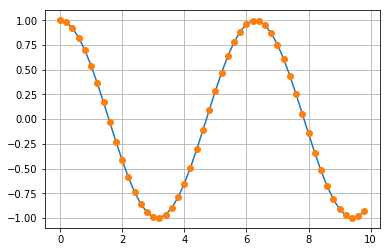

In [46]:
plt.plot(ts,scipysol[:,0])
plt.plot(ts,scipysol[:,0],'o')
plt.grid()
plt.show()